In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
import csv
output_data_file = "C:/users/anup/Homework_11/webvisualization.github.io/Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

582

In [17]:
# URL for Open Weather Map API data pull
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# sample data to evaluate data structure
test_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q=" + "richmond"
#print(test_url)
response = requests.get(test_url).json()
#pprint(response)
print(json.dumps(response, indent=2))

{
  "coord": {
    "lon": -123.14,
    "lat": 49.16
  },
  "weather": [
    {
      "id": 800,
      "main": "Clear",
      "description": "clear sky",
      "icon": "01n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 67.53,
    "pressure": 1017,
    "humidity": 64,
    "temp_min": 62.01,
    "temp_max": 71.01
  },
  "visibility": 16093,
  "wind": {
    "speed": 6.93,
    "deg": 170
  },
  "clouds": {
    "all": 1
  },
  "dt": 1563163116,
  "sys": {
    "type": 1,
    "id": 5232,
    "message": 0.0094,
    "country": "CA",
    "sunrise": 1563106952,
    "sunset": 1563164032
  },
  "timezone": -25200,
  "id": 6122085,
  "name": "Richmond",
  "cod": 200
}


In [18]:
# setup api call and record processing loops

search_data = []
city_list = []
country_list = []

query_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q="

count = 0
print("Begin API Call to OpenWeather Database")
print("---------------------------------------")


for city in cities:
    try:
        print(f"Processing record {count} for city: {city}")
        count += 1
        response = requests.get(query_url + city)
        city_json = response.json()
        country_abbrev = city_json['sys']['country']
        city_id = city_json['id']
        search_data.append(city_json)
        city_list.append(city)
        country_list.append(country_abbrev)
        print(f"Record found for city: {city}, country: {country_abbrev} with city id: {city_id}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")     
             

Begin API Call to OpenWeather Database
---------------------------------------
Processing record 0 for city: pangnirtung
Record found for city: pangnirtung, country: CA with city id: 6096551
Processing record 1 for city: hambantota
Record found for city: hambantota, country: LK with city id: 1244926
Processing record 2 for city: hermanus
Record found for city: hermanus, country: ZA with city id: 3366880
Processing record 3 for city: hilo
Record found for city: hilo, country: US with city id: 5855927
Processing record 4 for city: kavieng
Record found for city: kavieng, country: PG with city id: 2094342
Processing record 5 for city: rikitea
Record found for city: rikitea, country: PF with city id: 4030556
Processing record 6 for city: san patricio
Record found for city: san patricio, country: PY with city id: 3437029
Processing record 7 for city: faya
Record found for city: faya, country: SA with city id: 110690
Processing record 8 for city: abu jubayhah
No weather record found for city:

Record found for city: sainte-marie, country: CA with city id: 6945989
Processing record 78 for city: belushya guba
No weather record found for city: belushya guba
Processing record 79 for city: hasaki
Record found for city: hasaki, country: JP with city id: 2112802
Processing record 80 for city: punta arenas
Record found for city: punta arenas, country: CL with city id: 3874787
Processing record 81 for city: bambous virieux
Record found for city: bambous virieux, country: MU with city id: 1106677
Processing record 82 for city: bilma
Record found for city: bilma, country: NE with city id: 2446796
Processing record 83 for city: saint-philippe
Record found for city: saint-philippe, country: CA with city id: 6138908
Processing record 84 for city: port hawkesbury
Record found for city: port hawkesbury, country: CA with city id: 6111867
Processing record 85 for city: avera
Record found for city: avera, country: US with city id: 4231997
Processing record 86 for city: cabo san lucas
Record fo

Record found for city: aklavik, country: CA with city id: 5882953
Processing record 156 for city: vredendal
Record found for city: vredendal, country: ZA with city id: 3359736
Processing record 157 for city: northam
Record found for city: northam, country: AU with city id: 2064550
Processing record 158 for city: guerrero negro
Record found for city: guerrero negro, country: MX with city id: 4021858
Processing record 159 for city: saskylakh
Record found for city: saskylakh, country: RU with city id: 2017155
Processing record 160 for city: bur gabo
No weather record found for city: bur gabo
Processing record 161 for city: katsuura
Record found for city: katsuura, country: JP with city id: 1865309
Processing record 162 for city: nemuro
Record found for city: nemuro, country: JP with city id: 2128975
Processing record 163 for city: tasiilaq
Record found for city: tasiilaq, country: GL with city id: 3424607
Processing record 164 for city: sao joao da barra
Record found for city: sao joao da

Record found for city: pitiquito, country: MX with city id: 3992405
Processing record 234 for city: kapit
Record found for city: kapit, country: MY with city id: 1737185
Processing record 235 for city: tunduru
No weather record found for city: tunduru
Processing record 236 for city: tejutla
Record found for city: tejutla, country: GT with city id: 3588460
Processing record 237 for city: kavarna
Record found for city: kavarna, country: BG with city id: 730518
Processing record 238 for city: vostok
Record found for city: vostok, country: RU with city id: 2013279
Processing record 239 for city: warqla
No weather record found for city: warqla
Processing record 240 for city: sinnamary
Record found for city: sinnamary, country: GF with city id: 3380290
Processing record 241 for city: verkhnyaya maksakovka
Record found for city: verkhnyaya maksakovka, country: RU with city id: 474603
Processing record 242 for city: pundaguitan
Record found for city: pundaguitan, country: PH with city id: 1698

No weather record found for city: mullaitivu
Processing record 312 for city: kaitangata
Record found for city: kaitangata, country: NZ with city id: 2208248
Processing record 313 for city: mehamn
Record found for city: mehamn, country: NO with city id: 778707
Processing record 314 for city: hayesville
Record found for city: hayesville, country: US with city id: 4470359
Processing record 315 for city: kodiak
Record found for city: kodiak, country: US with city id: 4407665
Processing record 316 for city: cockburn town
Record found for city: cockburn town, country: TC with city id: 3576994
Processing record 317 for city: meulaboh
Record found for city: meulaboh, country: ID with city id: 1214488
Processing record 318 for city: kaset sombun
Record found for city: kaset sombun, country: TH with city id: 1610187
Processing record 319 for city: burica
No weather record found for city: burica
Processing record 320 for city: saint-pierre
Record found for city: saint-pierre, country: FR with cit

Record found for city: diamantina, country: BR with city id: 3464728
Processing record 392 for city: shimoda
Record found for city: shimoda, country: JP with city id: 1852357
Processing record 393 for city: tual
Record found for city: tual, country: ID with city id: 1623197
Processing record 394 for city: bitung
Record found for city: bitung, country: ID with city id: 1648636
Processing record 395 for city: estelle
Record found for city: estelle, country: FR with city id: 2969157
Processing record 396 for city: tam ky
Record found for city: tam ky, country: VN with city id: 1567148
Processing record 397 for city: san nicolas
Record found for city: san nicolas, country: PH with city id: 1688864
Processing record 398 for city: middlebury
Record found for city: middlebury, country: US with city id: 5238499
Processing record 399 for city: cuauhtemoc
Record found for city: cuauhtemoc, country: MX with city id: 3991622
Processing record 400 for city: kieta
Record found for city: kieta, count

Record found for city: molchanovo, country: RU with city id: 1498493
Processing record 472 for city: udachnyy
Record found for city: udachnyy, country: RU with city id: 2014624
Processing record 473 for city: santa cruz del sur
Record found for city: santa cruz del sur, country: CU with city id: 3537840
Processing record 474 for city: spalene porici
Record found for city: spalene porici, country: CZ with city id: 3065560
Processing record 475 for city: canatlan
Record found for city: canatlan, country: MX with city id: 4015683
Processing record 476 for city: tabasco
Record found for city: tabasco, country: MX with city id: 3982729
Processing record 477 for city: grand island
Record found for city: grand island, country: US with city id: 5069297
Processing record 478 for city: shubarshi
Record found for city: shubarshi, country: KZ with city id: 608270
Processing record 479 for city: maracaju
Record found for city: maracaju, country: BR with city id: 3457859
Processing record 480 for ci

Record found for city: helong, country: CN with city id: 1808534
Processing record 548 for city: marrakesh
Record found for city: marrakesh, country: MA with city id: 2542997
Processing record 549 for city: roswell
Record found for city: roswell, country: US with city id: 5488441
Processing record 550 for city: lavrentiya
Record found for city: lavrentiya, country: RU with city id: 4031637
Processing record 551 for city: bargal
No weather record found for city: bargal
Processing record 552 for city: hailey
Record found for city: hailey, country: US with city id: 5594956
Processing record 553 for city: baturyn
Record found for city: baturyn, country: UA with city id: 712745
Processing record 554 for city: shibarghan
No weather record found for city: shibarghan
Processing record 555 for city: pisco
Record found for city: pisco, country: PE with city id: 3932145
Processing record 556 for city: roald
Record found for city: roald, country: NO with city id: 3141667
Processing record 557 for 

In [19]:
# Get selected data gather from "search_data" list, created above

lat_list =  [data.get("coord").get("lat") for data in search_data]
lng_list = [data.get("coord").get("lon") for data in search_data]
temp_list = [data.get("main").get("temp") for data in search_data]
humid_list = [data.get("main").get("humidity") for data in search_data]
cloud_list =[data.get("clouds").get("all") for data in search_data]
wind_list = [data.get("wind").get("speed") for data in search_data]

In [20]:
# Setup df to hold city data
cities_df = pd.DataFrame({"City Name":city_list, 
                          "Country Code":country_list, 
                          "Latitude":lat_list, 
                          "Longitude":lng_list,
                          "Temp (F)":temp_list,
                          "Humidity (%)":humid_list,
                          "Cloudiness (%)":cloud_list,
                          "Wind Speed (mph)":wind_list})

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
City Name           517 non-null object
Country Code        517 non-null object
Latitude            517 non-null float64
Longitude           517 non-null float64
Temp (F)            517 non-null float64
Humidity (%)        517 non-null int64
Cloudiness (%)      517 non-null int64
Wind Speed (mph)    517 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 32.4+ KB


In [ ]:
# Export data frame to csv file

cities_df.to_csv(output_data_file)

In [ ]:
cities_df.head()

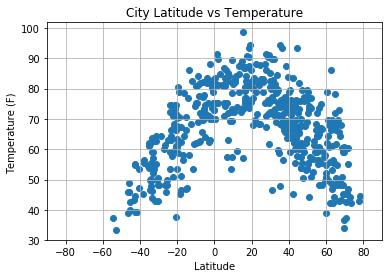

In [27]:
# Latitude vs Temperature
plt.scatter(cities_df["Latitude"], cities_df["Temp (F)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Temperature.png")

# Show plot
plt.show()

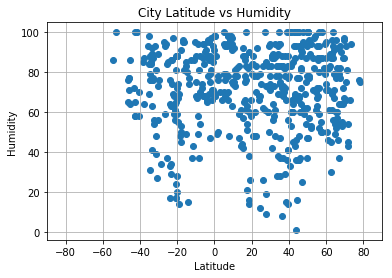

In [28]:
# Latitude vs Humidity
plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Humidity.png")

# Show plot
plt.show()

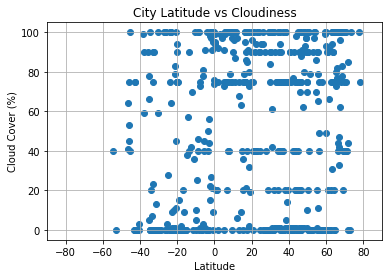

In [29]:
# Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness (%)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Cloudiness.png")

# Show plot
plt.show()

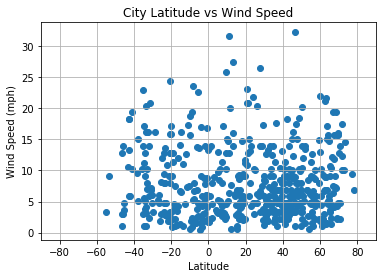

In [30]:
# Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (mph)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-WindSpeed.png")

# Show plot
plt.show()

In [31]:
# export DF to HTML
cities_table = cities_df.to_html(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, bold_rows=True, classes=None, escape=True, max_rows=None, max_cols=None, show_dimensions=False, notebook=False)
cities_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City Name</th>\n      <th>Country Code</th>\n      <th>Latitude</th>\n      <th>Longitude</th>\n      <th>Temp (F)</th>\n      <th>Humidity (%)</th>\n      <th>Cloudiness (%)</th>\n      <th>Wind Speed (mph)</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>pangnirtung</td>\n      <td>CA</td>\n      <td>66.15</td>\n      <td>-65.72</td>\n      <td>49.41</td>\n      <td>54</td>\n      <td>44</td>\n      <td>2.42</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>hambantota</td>\n      <td>LK</td>\n      <td>6.12</td>\n      <td>81.12</td>\n      <td>86.00</td>\n      <td>79</td>\n      <td>75</td>\n      <td>10.29</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>hermanus</td>\n      <td>ZA</td>\n      <td>-34.42</td>\n      <td>19.24</td>\n      <td>50.00</td>\n      <td>88</td>\n      <td>0</td>\n      <td>1.01</td>\n    </tr>\n    <tr>